In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import random
from scipy.stats import norm
from run_experiments import * 
import matplotlib.pyplot as plt

# Question 1

In [2]:
# init parameters, same for question 1 and 2
m = 2000
d = 2000
s = d/100
iterations = 100*d

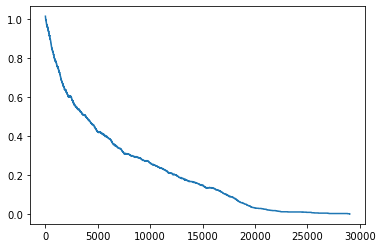

In [3]:
# check everything is working 
beta = 10
run_exp = RunExperiment(beta, m, d, s)
plt.plot(run_exp.get_sampling_losses(iterations))

In [4]:
repeat_n_times=15
betas=[5, 10, 20, 50, 100]
run_multiple_multi_proc(repeat_n_times, betas, m, d, s, fixed_ones=True, sign=False, iterations=iterations)

beta= 100 n_iterations= 57534.933333333334 loss 0.0
beta= 20 n_iterations= 61829.066666666666 loss 0.0
beta= 10 n_iterations= 71539.0 loss 0.0
beta= 50 n_iterations= 86019.53333333334 loss 0.0033333333333333335
beta= 5 n_iterations= 84562.6 loss 0.006666666666666667
Best result: beta= 100 n_iterations= 57534.933333333334 loss 0.0


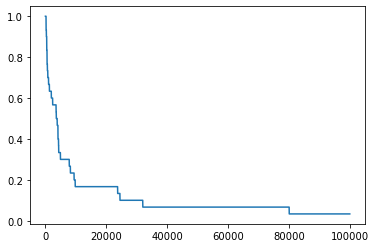

In [62]:
# test if simulation annealing is working
beta = 5
run_exp = RunExperiment(beta, m, d, s, fixed_ones=True)
res = run_exp.get_sampling_losses(100000, change_beta_every= 5000, update_beta=lambda x : x * 1.4)
plt.plot(res, label = 'beta=100')

In [74]:
# start by running by repeating only once (just to get a general idea), then for fine-graining increase
# searching for best beta and simulation technique
best_mse = math.inf
best_n_iterations = math.inf
best_params = None

repeat_experiment_n = 1
for beta_start in [0.01, 0.05, 0.1, 0.5, 1, 5, 10]: 
    for increse_every in [2, 5, 10, 100, 1000, 1500, 2000, 3000]: 
        for multiplicative_increase in [1.00001,1.0001, 1.0005, 1.001, 1.01, 1.1, 1.2, 1.3]:
            mse, required_iterations = run_multiple_experiments(5, beta, m, d, s, fixed_ones=False, sign=False, iterations = iterations, change_beta_every= increse_every, update_beta=lambda x : x * multiplicative_increase)
            # mse, required_iterations = run_multiple_experiments(repeat_experiment_n, get_simulation_annealing_losses, iterations, beta_start, m, d, increse_every, lambda x : x * multiplicative_increase)
            if mse <= best_mse and required_iterations <= best_n_iterations: 
                best_mse = mse
                best_n_iterations = required_iterations
                best_params_and_scores = {'beta_start': beta_start, 'increase_every': increse_every, 'multiplicative_increase' : multiplicative_increase}
                print(best_params_and_scores, 'required_iterations', required_iterations)

print(best_mse, best_n_iterations)
print(best_params_and_scores)

{'beta_start': 0.01, 'increase_every': 2, 'multiplicative_increase': 1.00001} required_iterations 40314.2


/home/stefano/Documents/EPFL/MC/MC-project/run_experiments.py:86: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-self.beta * (new_noise - old_noise))
/home/stefano/Documents/EPFL/MC/MC-project/run_experiments.py:86: RuntimeWarning: overflow encountered in double_scalars
  comp = np.exp(-self.beta * (new_noise - old_noise))


{'beta_start': 0.01, 'increase_every': 10, 'multiplicative_increase': 1.00001} required_iterations 36663.0
{'beta_start': 1, 'increase_every': 2, 'multiplicative_increase': 1.00001} required_iterations 36555.8
{'beta_start': 10, 'increase_every': 1500, 'multiplicative_increase': 1.00001} required_iterations 36404.2
0.0 36404.2
{'beta_start': 10, 'increase_every': 1500, 'multiplicative_increase': 1.00001}


In [ ]:
m_values = np.arange(100 , 2200, 100)
multiplicative_increase =  1.00001
increase_every = 1500
beta =  10

run_multiple_ms(repeat_n_times, betas, m_values, d, s, multiplicative_increase, increase_every, fixed_ones=False, sign=False, iterations = 0)

running MC for m=100
200000.0
running MC for m=200
200000.0
running MC for m=300
200000.0
running MC for m=400
200000.0
running MC for m=500
200000.0
running MC for m=600
200000.0
running MC for m=700
200000.0
running MC for m=800
200000.0
running MC for m=900
200000.0
running MC for m=1000
200000.0
running MC for m=1100
200000.0
running MC for m=1200
200000.0
running MC for m=1300
200000.0
running MC for m=1400
112535.0
running MC for m=1500
94049.0
running MC for m=1600
44171.0
running MC for m=1700
44676.0
running MC for m=1800
34213.0
running MC for m=1900
24691.0
running MC for m=2000
30476.0
running MC for m=2100
19978.0


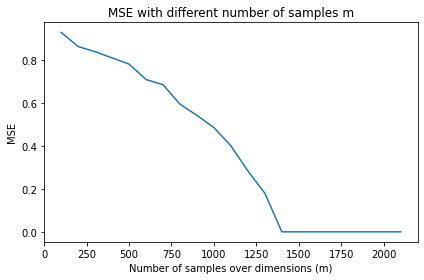

In [4]:
losses_with_different_m = []
m_values = np.arange(100 , 2200, 100)
multiplicative_increase =  1.00001
increase_every = 1500
beta =  10


for m_value in  m_values: 
    # for the different values of m only save the last loss (after doing all the iterations)

    mse, n_iterations = run_multiple_experiments(10, beta, m_value, d, s, fixed_ones=False, sign=False, iterations = iterations, change_beta_every= increase_every, update_beta=lambda x : x * multiplicative_increase)
    print(f'm={m_value}, iterations= {n_iterations}')
    losses_with_different_m.append(mse)


plt.plot(m_values, losses_with_different_m) # always changes
plt.ylabel('MSE')
plt.xlabel('Number of samples over dimensions (m)')
plt.title('MSE with different number of samples m')
plt.tight_layout()

plt.savefig('img/q1_ex6_minimum_m_to_recover.jpg')


# Question 2

/home/stefano/Documents/EPFL/MC/MC-project/run_experiments.py:86: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-self.beta * (new_noise - old_noise))


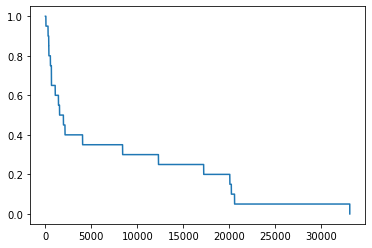

In [5]:
run_exp = RunExperiment(1000, m, d, s, fixed_ones=True)

plt.plot(run_exp.get_sampling_losses(100000), label = 'beta=100')

In [10]:
# start by running by repeating only once (just to get a general idea), then for fine-graining increase
best_beta = 0
best_loss = math.inf
best_iterations = math.inf

for beta in [100, 200, 500, 1000, 2000, 5000, 10000]: 
    loss, n_iterations = run_multiple_experiments(10, beta, m, d, s, fixed_ones=True, sign=False, iterations = iterations)

    if loss <= best_loss and n_iterations <= best_iterations: 
        best_beta = beta
        best_loss = loss
        best_iterations = n_iterations

    print('beta=', beta, 'n_iterations=',best_iterations, 'loss',best_loss)

print('beta=', best_beta, 'n_iterations=',best_iterations, best_loss)
# 7 minutes

beta= 100 n_iterations= 54874.7 loss 0.0
beta= 200 n_iterations= 54874.7 loss 0.0
beta= 500 n_iterations= 46715.4 loss 0.0
beta= 1000 n_iterations= 46715.4 loss 0.0
beta= 2000 n_iterations= 46715.4 loss 0.0
beta= 5000 n_iterations= 44038.1 loss 0.0
beta= 10000 n_iterations= 44038.1 loss 0.0
beta= 5000 n_iterations= 44038.1 0.0


In [ ]:
import math
from concurrent.futures import ProcessPoolExecutor

def run_experiment(beta):
    loss, n_iterations = run_multiple_experiments(10, beta, m, d, s, fixed_ones=True, sign=False, iterations=iterations)
    return beta, loss, n_iterations

best_beta = 0
best_loss = math.inf
best_iterations = math.inf

with ProcessPoolExecutor() as executor:
    futures = {executor.submit(run_experiment, beta): beta for beta in [100, 200, 500, 1000, 2000, 5000, 10000]}

    for future in concurrent.futures.as_completed(futures):
        beta, loss, n_iterations = future.result()

        if loss <= best_loss and n_iterations <= best_iterations:
            best_beta = beta
            best_loss = loss
            best_iterations = n_iterations

        print('beta=', beta, 'n_iterations=', best_iterations, 'loss', best_loss)

print('Best result: beta=', best_beta, 'n_iterations=', best_iterations, 'loss', best_loss)


In [12]:
best_mse = math.inf
best_n_iterations = math.inf
best_params = None

repeat_experiment_n = 1
for beta_start in [0.1, 0.5, 1, 5, 10, 20, 50, 100]: 
    for increse_every in [2, 5, 10, 100, 1000, 1500, 2000, 3000]: 
        for multiplicative_increase in [1.00001, 1.0001, 1.0005, 1.001, 1.01, 1.1, 1.2, 1.3]:
            mse, required_iterations = run_multiple_experiments(2, beta, m, d, s, fixed_ones=True, sign=False, iterations = iterations, change_beta_every= increse_every, update_beta=lambda x : x * multiplicative_increase)
            # mse, required_iterations = run_multiple_experiments(repeat_experiment_n, get_simulation_annealing_losses, iterations, beta_start, m, d, increse_every, lambda x : x * multiplicative_increase)
            if mse <= best_mse and required_iterations <= best_n_iterations: 
                best_mse = mse
                best_n_iterations = required_iterations
                best_params_and_scores = {'beta_start': beta_start, 'increase_every': increse_every, 'multiplicative_increase' : multiplicative_increase}
                print(best_params_and_scores, 'required_iterations', required_iterations)

print(best_mse, best_n_iterations)
print(best_params_and_scores)

{'beta_start': 0.1, 'increase_every': 2, 'multiplicative_increase': 1.00001} required_iterations 49366.0
{'beta_start': 0.1, 'increase_every': 2, 'multiplicative_increase': 1.0001} required_iterations 42599.0
{'beta_start': 0.1, 'increase_every': 2, 'multiplicative_increase': 1.0005} required_iterations 32357.0
{'beta_start': 0.1, 'increase_every': 5, 'multiplicative_increase': 1.1} required_iterations 29195.0
{'beta_start': 0.1, 'increase_every': 2000, 'multiplicative_increase': 1.01} required_iterations 20494.5
{'beta_start': 1, 'increase_every': 1000, 'multiplicative_increase': 1.00001} required_iterations 19761.0
{'beta_start': 5, 'increase_every': 5, 'multiplicative_increase': 1.01} required_iterations 18948.5
{'beta_start': 50, 'increase_every': 100, 'multiplicative_increase': 1.00001} required_iterations 15676.0
0.0 15676.0
{'beta_start': 50, 'increase_every': 100, 'multiplicative_increase': 1.00001}


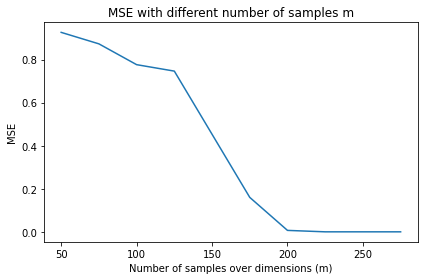

In [20]:


losses_with_different_m = []
m_values = np.arange(50 , 300, 25)

for m_value in  m_values: 
    # for the different values of m only save the last loss (after doing all the iterations)
    print(f'running MC for m={m_value}')
    beta =  50
    increase_every = 100
    multiplicative_increase =  1.00001
    mse, n_iterations = run_multiple_experiments(15, beta, m_value, d, s, fixed_ones=True, sign=False, iterations = iterations, change_beta_every= increase_every, update_beta= multiplicative_increase)
    print(n_iterations)
    losses_with_different_m.append(mse)


plt.plot(m_values, losses_with_different_m) # always changes
plt.ylabel('MSE')
plt.xlabel('Number of samples over dimensions (m)')
plt.title('MSE with different number of samples m')
plt.tight_layout()

plt.savefig('img/q2_ex3_minimum_m_to_recover.jpg')


# Question 3

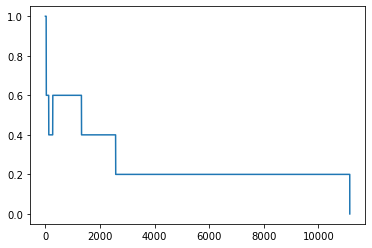

In [3]:
m3 = 100
d3 = 500
s3 = d3/100
#beta = 2
iterations3 = 100*d3

run_exp = RunExperiment(1, m3, d3, s3, fixed_ones=True, sign= True)

plt.plot(run_exp.get_sampling_losses(iterations3), label = 'beta=100')

In [6]:
repeat_n_times=15
betas=[0.1, 1, 10, 20, 30, 50, 80, 100, 200, 500, 1000]
run_multiple_multi_proc(repeat_n_times, betas, m3, d3, s3, fixed_ones=True, sign=True, iterations=iterations3)

/home/stefano/Documents/EPFL/MC/MC-project/run_experiments.py:89: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-self.beta * (new_noise - old_noise))
/home/stefano/Documents/EPFL/MC/MC-project/run_experiments.py:89: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-self.beta * (new_noise - old_noise))
/home/stefano/Documents/EPFL/MC/MC-project/run_experiments.py:89: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-self.beta * (new_noise - old_noise))
/home/stefano/Documents/EPFL/MC/MC-project/compute_noise.py:69: RuntimeWarning: divide by zero encountered in log
  return -(np.log(alpha[self.ones_indices]).sum() + np.log(1 - alpha[self.min_one_indices]).sum())
/home/stefano/Documents/EPFL/MC/MC-project/run_experiments.py:89: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-self.beta * (new_noise - old_noise))
/home/stefano/Documents/EPFL/MC/MC-project/run_experiments.py:89: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-self

beta= 1000 n_iterations= 7227.666666666667 loss 0.02666666666666667


/home/stefano/Documents/EPFL/MC/MC-project/compute_noise.py:69: RuntimeWarning: divide by zero encountered in log
  return -(np.log(alpha[self.ones_indices]).sum() + np.log(1 - alpha[self.min_one_indices]).sum())


beta= 20 n_iterations= 8471.133333333333 loss 0.04000000000000001
beta= 1 n_iterations= 9246.0 loss 0.0
beta= 100 n_iterations= 10917.666666666666 loss 0.02666666666666667


/home/stefano/Documents/EPFL/MC/MC-project/compute_noise.py:69: RuntimeWarning: divide by zero encountered in log
  return -(np.log(alpha[self.ones_indices]).sum() + np.log(1 - alpha[self.min_one_indices]).sum())


beta= 10 n_iterations= 13480.933333333332 loss 0.04000000000000001
beta= 80 n_iterations= 14004.2 loss 0.10666666666666667
beta= 30 n_iterations= 14334.933333333332 loss 0.13333333333333333
beta= 50 n_iterations= 16983.133333333335 loss 0.08000000000000002
beta= 500 n_iterations= 16431.666666666668 loss 0.13333333333333333


/home/stefano/Documents/EPFL/MC/MC-project/compute_noise.py:69: RuntimeWarning: divide by zero encountered in log
  return -(np.log(alpha[self.ones_indices]).sum() + np.log(1 - alpha[self.min_one_indices]).sum())


beta= 200 n_iterations= 16228.6 loss 0.09333333333333334
beta= 0.1 n_iterations= 48619.73333333333 loss 0.8133333333333334
Best result: beta= 1000 n_iterations= 7227.666666666667 loss 0.02666666666666667


In [17]:
best_mse = math.inf
best_n_iterations = math.inf
best_params = None

repeat_experiment_n = 1
for beta_start in [0.01, 0.05, 0.1, 0.5, 1, 5, 10]: 
    for increse_every in [2, 5, 10, 100, 1000, 1500, 2000, 3000]: 
        for multiplicative_increase in [1.00001,1.0001, 1.0005, 1.001, 1.01, 1.1, 1.2, 1.3]:
            beta, mse, required_iterations = run_multiple_experiments(5, beta, m3, d3, s3, fixed_ones=True, sign=True, iterations = iterations3, change_beta_every= increse_every, update_beta= multiplicative_increase)
            # mse, required_iterations = run_multiple_experiments(repeat_experiment_n, get_simulation_annealing_losses, iterations, beta_start, m, d, increse_every, lambda x : x * multiplicative_increase)
            if mse <= best_mse and required_iterations <= best_n_iterations: 
                best_mse = mse
                best_n_iterations = required_iterations
                best_params_and_scores = {'beta_start': beta_start, 'increase_every': increse_every, 'multiplicative_increase' : multiplicative_increase}
                print(best_params_and_scores, 'required_iterations', required_iterations)

print(best_mse, best_n_iterations)
print(best_params_and_scores)

{'beta_start': 0.01, 'increase_every': 2, 'multiplicative_increase': 1.00001} required_iterations 50000.0
{'beta_start': 0.01, 'increase_every': 2, 'multiplicative_increase': 1.0001} required_iterations 50000.0
{'beta_start': 0.01, 'increase_every': 2, 'multiplicative_increase': 1.0005} required_iterations 23113.2


/home/stefano/Documents/EPFL/MC/MC-project/run_experiments.py:89: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-self.beta * (new_noise - old_noise))
/home/stefano/Documents/EPFL/MC/MC-project/run_experiments.py:89: RuntimeWarning: overflow encountered in double_scalars
  comp = np.exp(-self.beta * (new_noise - old_noise))


{'beta_start': 0.01, 'increase_every': 2, 'multiplicative_increase': 1.1} required_iterations 6481.6
{'beta_start': 0.01, 'increase_every': 2, 'multiplicative_increase': 1.2} required_iterations 3870.2
{'beta_start': 0.01, 'increase_every': 2000, 'multiplicative_increase': 1.3} required_iterations 3486.4
{'beta_start': 0.05, 'increase_every': 10, 'multiplicative_increase': 1.2} required_iterations 2823.8
{'beta_start': 0.05, 'increase_every': 2000, 'multiplicative_increase': 1.2} required_iterations 2796.8


In [16]:
losses_with_different_m = []
m_values = np.arange(10, 250, 20)

for m_value in  m_values: 
    # for the different values of m only save the last loss (after doing all the iterations)
    print(f'running MC for m={m_value}')
    beta =  0.001
    increase_every = 1500
    multiplicative_increase =  1.0005
    beta, mse, n_iterations = run_multiple_experiments(15, beta, m_value, d3, s3, fixed_ones=True, sign=True, 
                                                 iterations = iterations3, change_beta_every= increase_every, update_beta= multiplicative_increase)
    print(n_iterations)
    losses_with_different_m.append(mse)


plt.plot(m_values, losses_with_different_m) # always changes
plt.ylabel('MSE')
plt.xlabel('Number of samples over dimensions (m)')
plt.title('MSE with different number of samples m')
plt.tight_layout()

plt.savefig('img/q3_ex2_minimum_m_to_recover.jpg')


running MC for m=10


/home/stefano/Documents/EPFL/MC/MC-project/compute_noise.py:69: RuntimeWarning: divide by zero encountered in log
  return -(np.log(alpha[self.ones_indices]).sum() + np.log(1 - alpha[self.min_one_indices]).sum())


50000.0
running MC for m=30
50000.0
running MC for m=50
50000.0
running MC for m=70
50000.0
running MC for m=90
50000.0
running MC for m=110
50000.0
running MC for m=130
50000.0
running MC for m=150
50000.0
running MC for m=170


KeyboardInterrupt: 